In [1]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from statistics import mean 

In [2]:
#Loading and parsing data funciton
def load_data(fname):
    X=[]
    Y=[]
    f = open(fname,"r")
    for i,line in enumerate(f.readlines()):
        row = line.strip()
        nrow = row.replace('\t',' ')
        row_data = nrow.split(' ')
        X.append([])
        for j in row_data[0:4]:
            X[i].append(float(j))
        Y.append(int(row_data[-1]))
    X = np.array(X)
    X0 = np.ones(len(X))
    X0 = np.array(X0).reshape(len(X),1)
    X = np.concatenate((X0,X),axis=1)
    Y = np.array(Y)
    return X,Y

In [3]:
def shuffle(X,Y):
    id = [x for x in range(len(X))]
    ShuffleX = []
    ShuffleY = []
    rd.shuffle(id)
    for i in id:
        ShuffleX.append(X[i])
        ShuffleY.append(Y[i])
    return ShuffleX,ShuffleY

In [4]:
def sign(xt,wt):
    if np.dot(xt,wt)>0:
        return 1
    else:
        return -1

In [6]:
def getErrorRate(X,Y,W_t):
    Error=0
    for i in range(len(X)):
        if sign(X[i],W_t) != Y[i]:
            Error+=1
    return Error/len(X)

In [7]:
#Modified pocket PLA Model for Q8
def pocketPLA_M(X,Y,W,iteration):
    index = 0
    iter = 1
    Error = getErrorRate(X,Y,W)
    while(iter<=iteration):
        if sign(X[index],W) != Y[index]: 
            W = W+Y[index]*X[index]
            Error_t = getErrorRate(X,Y,W)

            if Error_t<Error:
                Error = Error_t
                W_pocket = W
            iter += 1
    
        if index == len(X)-1:
            index = 0
        else:
            index += 1
    return W

In [8]:
X_train,Y_train = load_data("hw1_7_train.dat")
W = np.zeros(5)
np.array(W).reshape(5,1)
X_test,Y_test = load_data("hw1_7_test.dat")

In [10]:
eval = []
for i in range(1126):
    random = rd.randint(0,9999)
    rd.seed(random)
    x,y = shuffle(X_train,Y_train)
    W_pocket = pocketPLA_M(x,y,W,100)
    test_error = getErrorRate(X_test,Y_test,W_pocket)
    eval.append(test_error)

The average error rate on the test set is  0.3512877442273535


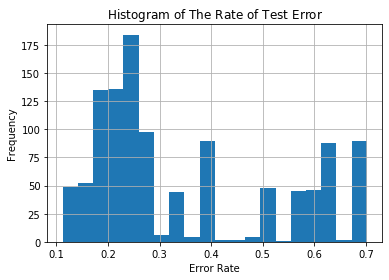

In [11]:
avg_error = mean(eval)
print("The average error rate on the test set is ",avg_error)

#Plot histogram to show number of test error based on W100
plt.figure()
plt.hist(eval,bins=20)
plt.ylabel('Frequency')
plt.xlabel('Error Rate')
plt.title(r'$\mathrm{Histogram\ of\ The\ Rate\ of\ Test\ Error}$')
plt.grid(True)
plt.show()